In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_review_length = 256
train_data = pad_sequences(train_data,maxlen=max_review_length,padding='post',truncating='post')
test_data = pad_sequences(test_data,maxlen=max_review_length,padding='post',truncating='post')

In [ ]:
import numpy as np
train_labels = np.asarray(train_labels).astype('float32')
test_labels = np.asarray(test_labels).astype('float32')


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
vocab_size = 10000
embedding_dim = 128
model = Sequential([
    Embedding( input_dim=vocab_size,output_dim=embedding_dim,input_length=max_review_length),
    GlobalAveragePooling1D(),
    Dense(16,activation='relu'),
    Dense(1 ,activation='sigmoid')
])

model.summary()
print("-" * 40)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

----------------------------------------


In [ ]:
print("step 3: Compiling the model")
print("---------------------------")
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])
print("Model compiled successfully! Ready to train.")

step 3: Compiling the model
---------------------------
Model compiled successfully! Ready to train.


In [ ]:
print("step 4: Training the model")
print("---------------------------")
history = model.fit(train_data,
                    train_labels,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)
print("Model training complete!")

step 4: Training the model
---------------------------
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.6262 - loss: 0.6242 - val_accuracy: 0.8562 - val_loss: 0.3537
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.8698 - loss: 0.3187 - val_accuracy: 0.8750 - val_loss: 0.3085
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.9046 - loss: 0.2403 - val_accuracy: 0.8818 - val_loss: 0.2965
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9197 - loss: 0.2121 - val_accuracy: 0.8574 - val_loss: 0.3514
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9364 - loss: 0.1726 - val_accuracy: 0.8528 - val_loss: 0.3815
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9398 - loss: 0.1625 - val_accuracy: 0.8712 - val_loss: 0.3530
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9451 - loss: 0.1501 - val_accuracy: 0.8844 - val_loss: 0.3348
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━

In [ ]:
print("Step 5: Evaluating the Model on New, Unseen Test Data...")
print("------------------------------------------------------------")
loss, accuracy = model.evaluate(test_data, test_labels, verbose=2)
print(f"Final Test Loss: {loss:.4f}")
print(f"Final Test Accuracy: {accuracy:.4f}")

Step 5: Evaluating the Model on New, Unseen Test Data...
------------------------------------------------------------
782/782 - 2s - 2ms/step - accuracy: 0.8519 - loss: 0.4369
Final Test Loss: 0.4369
Final Test Accuracy: 0.8519



Step 6: Visualizing Training Progress...
-----------------------------------------


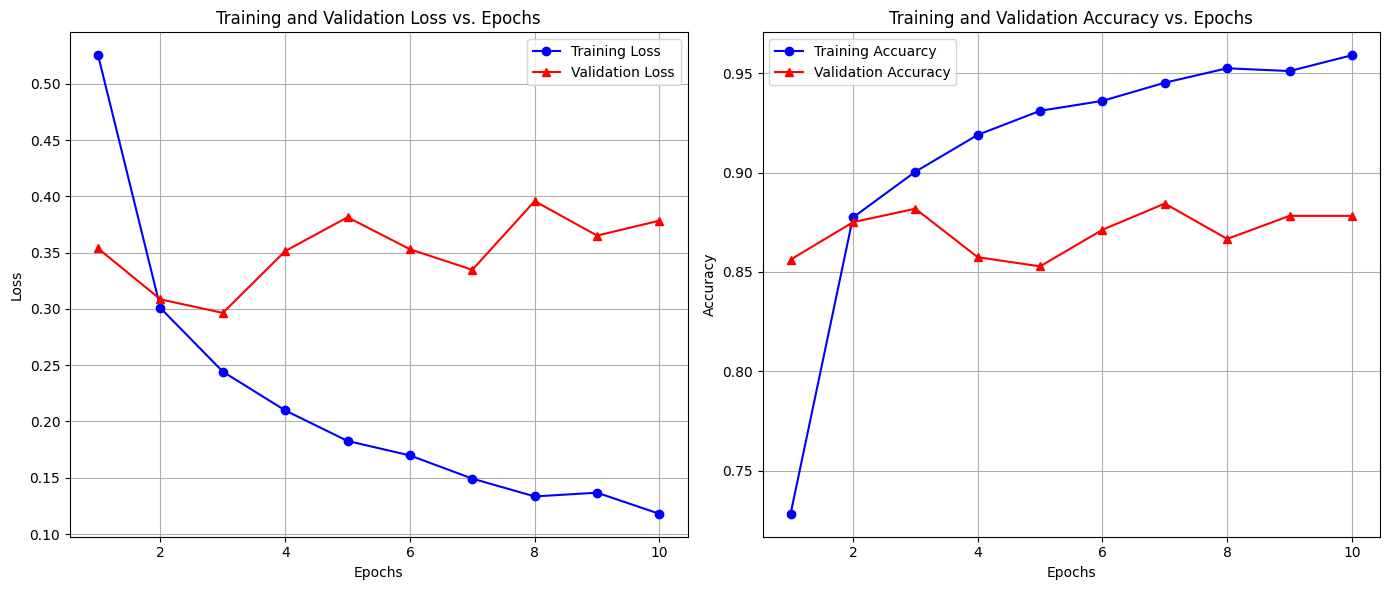

In [ ]:
import matplotlib.pyplot as plt
print("\nStep 6: Visualizing Training Progress...")
print("-----------------------------------------")
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r^-', label='Validation Loss')
plt.title('Training and Validation Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo-', label='Training Accuarcy')
plt.plot(epochs, val_acc, 'r^-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
print("\n Example: Making a prediction on a sample review")
sample_review_for_prediction = test_data[2:3]
true_sentiment_label = test_labels[2]
prediction_probability = model.predict(sample_review_for_prediction)[0][0]
predicted_sentiment = "positive" if prediction_probability > 0.5 else "Negative"
true_sentiment = "postive" if true_sentiment_label == 1 else "Negative"
print(f"Actual sentiment for the first test review :{true_sentiment}")
print(f"Models predicted probabilty(0-1):{prediction_probability:4f}")
print(f" Models predicted sentiment:{predicted_sentiment}")


 Example: Making a prediction on a sample review
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Actual sentiment for the first test review :postive
Models predicted probabilty(0-1):0.958828
 Models predicted sentiment:positive
